# Heart Attack Prediction(Classification)

In this project, you have to predict whether a patient has a heart attack less likely or is more likely based on the medical information of a patient

### Import required libraries

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
%matplotlib inline

### Understanding the data

### `Medical Information.csv`:

* Age
* Sex
* Does pain start with a specific activity? (exang)
    * Number one means yes
    * The number zero means no
* Number of main vessels (ca)
    * A value from zero to three
* Type of chest pain (cp)
    * Value 1: Direct heart pain
    * Value 2: Indirect pain that causes pain in the heart
    * Value 3: Non-cardiac pain
    * Value 4: No symptoms
* Resting blood pressure (trtbps)
* Blood fat (chol)
* High fasting blood sugar - Diabetes (fbs)
    * Value one: Yes
    * Zero value: None
* Resting ECG result (rest_ecg)
    * Zero value: normal
    * Value one: The ST section of the ECG is abnormal
    * Value two: Probably or definitely the left ventricle is large
* Maximum heart rate (thalach)
* Chance of a heart attack (target)
    * Zero value: low chance
    * Value one: High odds

### Reading the data in

In [188]:
df = pd.read_csv("Medical Information.csv")

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data prepreation

In [178]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

In [189]:
#Delete duplicate rows in data
duplicated = df[df.duplicated()]
print(duplicated.shape)

df = df.drop_duplicates()

(1, 14)


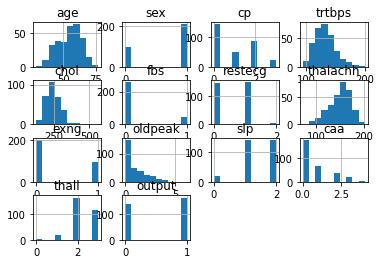

In [180]:
df.hist()
plt.show()

### Creating train and test dataset

In [190]:
x = df.drop("output", axis=1)
y = df["output"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Modeling

#### K Nearest Neighbors

In [191]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn =  KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_predicted_knn = knc.predict(x_test)
print("Accuracy of KNN: ", metrics.accuracy_score(y_test,y_predicted_knn))

Accuracy of KNN:  0.7213114754098361


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [192]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:441: UserWarning: X does not have v

array([0.63934426, 0.6557377 , 0.78688525, 0.72131148, 0.6557377 ,
       0.75409836, 0.75409836, 0.75409836, 0.70491803])

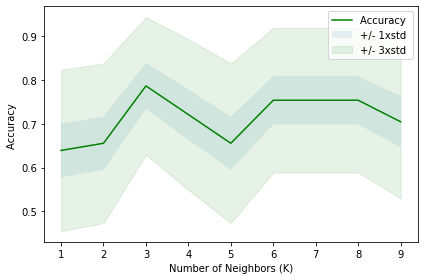

In [193]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [194]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7868852459016393 with k= 3


#### Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=3)
dt.fit(x_train,y_train)
y_predicted_dt = dt.predict(x_test)
print("Accuracy of Decision Tree: " , metrics.accuracy_score(y_test,y_predicted_dt))

Accuracy of Decision Tree:  0.8524590163934426


#### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(solver='liblinear', random_state=1)
lr.fit(x_train, y_train)
y_predicted_lr = lr.predict(x_test)
print("Accuracy of logistic regression: " ,metrics.accuracy_score(y_test,y_predicted_lr))

Accuracy of logistic regression:  0.8852459016393442


In [197]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predicted_lr, pos_label=0)

0.7878787878787878

In [198]:
yhat_prob = lr.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.29805236180018435

#### Support Vector Machine

In [199]:
from sklearn import svm
s = svm.SVC(kernel='linear')
s.fit(x_train, y_train)
y_predicted_svm = s.predict(x_test)
print("Accuracy of svm: ", metrics.accuracy_score(y_test,y_predicted_svm))

Accuracy of svm:  0.8524590163934426


#### Random Forest

In [200]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_predicted_rf = rf.predict(x_test)
print("Accuracy of Random Forest: ", metrics.accuracy_score(y_test, y_predicted_rf))

Accuracy of Random Forest:  0.8524590163934426


### Comparison of algorithms

In [201]:
a_lr = metrics.accuracy_score(y_test,y_predicted_lr)
a_dt = metrics.accuracy_score(y_test,y_predicted_dt)
a_rf = metrics.accuracy_score(y_test, y_predicted_rf)
a_knn = metrics.accuracy_score(y_test,y_predicted_knn)
a_svm = metrics.accuracy_score(y_test,y_predicted_svm)

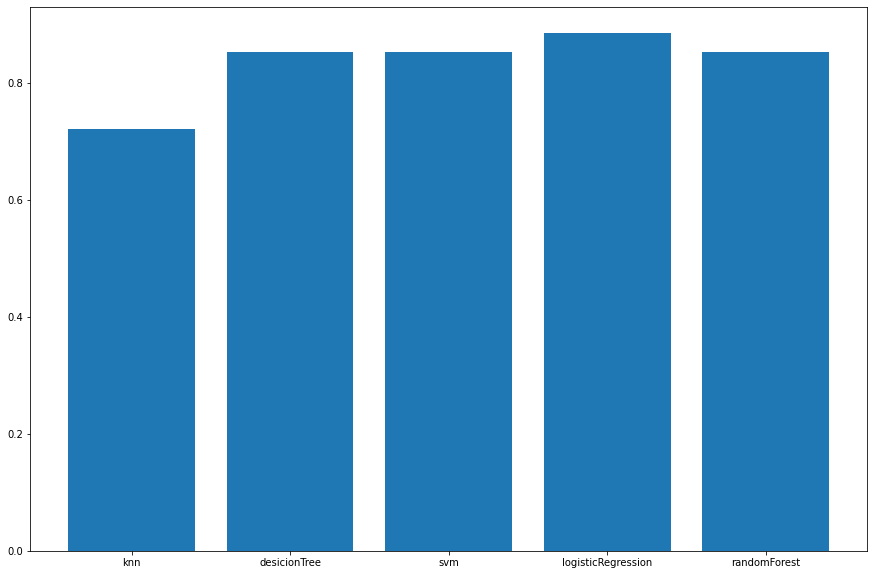

In [202]:
plt.figure(figsize=(15,10))
algorithms = ['knn', 'desicionTree', 'svm', 'logisticRegression', 'randomForest']
accuracies = (a_knn, a_dt, a_svm, a_lr,a_rf)

plt.bar(algorithms, accuracies, align='center')

plt.show()